In [6]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Set the path of the dataset
dataset_path = "data/asl_alphabet_train/asl_alphabet_train"




In [7]:
# Initialize arrays to hold data and labels
data = []
labels = []
labels_dict = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'J':9, 'K':10, 'L':11, 'M':12, 'N':13, 'O':14, 'P':15, 'Q':16, 'R':17, 'S':18, 'T':19, 'U':20, 'V':21, 'W':22, 'X':23, 'Y':24, 'Z':25}

def load_data(dataset_path):
    # Loop through each subdirectory in the main directory
    for directory in sorted(os.listdir(dataset_path)):
        if directory in labels_dict:
            print(f"{directory}")
            for file in os.listdir(f"{dataset_path}/{directory}"):
                # Open image file
                img = Image.open(f"{dataset_path}/{directory}/{file}")
                
                # Resize the image
                img = img.resize((64,64))

                # Convert image data to numpy array and flatten it
                img_data = np.array(img).flatten()

                # Append image data to data array
                data.append(img_data)

                # Append label to labels array
                labels.append(directory)
    return np.array(data), np.array(labels)



In [9]:
data, labels = load_data(dataset_path)

A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z


In [10]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)


In [11]:
# Create a decision tree classifier
classifier = tree.DecisionTreeClassifier()

In [12]:
# Train the classifier
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [13]:
# Use the classifier to make predictions on the test set
predictions = classifier.predict(x_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, predictions)

print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 89.25%


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns



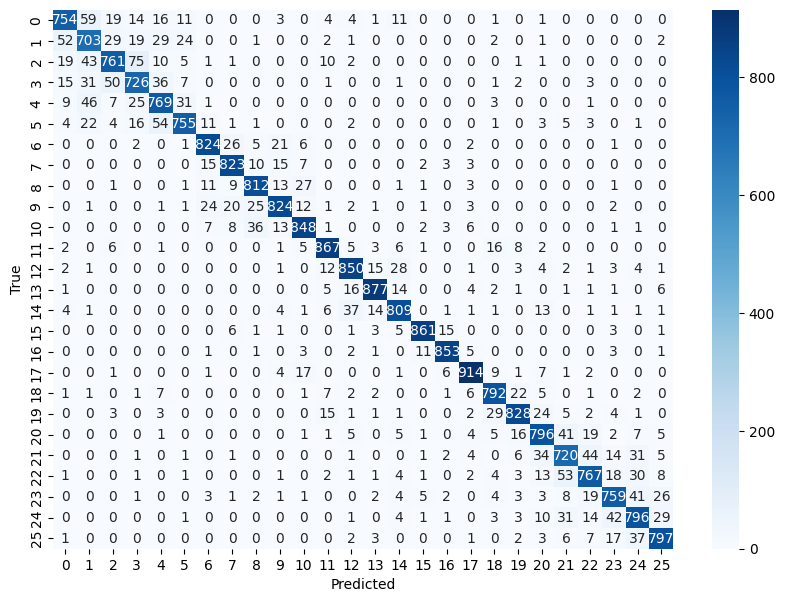

In [15]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, predictions)

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [16]:


# Evaluate the model
print('Accuracy:', accuracy_score(y_test, predictions))
print('Precision:', precision_score(y_test, predictions, average='weighted'))
print('Recall:', recall_score(y_test, predictions, average='weighted'))
print('F1 Score:', f1_score(y_test, predictions, average='weighted'))
print('\nClassification Report:\n', classification_report(y_test, predictions))

Accuracy: 0.8925213675213676
Precision: 0.892804923091994
Recall: 0.8925213675213676
F1 Score: 0.8925400055937747

Classification Report:
               precision    recall  f1-score   support

           A       0.87      0.84      0.86       898
           B       0.77      0.81      0.79       865
           C       0.86      0.82      0.84       929
           D       0.82      0.83      0.83       873
           E       0.83      0.86      0.85       892
           F       0.90      0.86      0.88       883
           G       0.92      0.93      0.92       888
           H       0.92      0.94      0.93       878
           I       0.91      0.92      0.92       880
           J       0.91      0.90      0.91       918
           K       0.91      0.92      0.91       926
           L       0.93      0.94      0.93       923
           M       0.91      0.92      0.91       928
           N       0.95      0.94      0.95       929
           O       0.90      0.90      0.90       